# Projeto Prático 2 - Parte III

#### Alunos:
   - Bonifácio de Oliveira (bldof.eng16@uea.edu.br)
   - Luiz Fábio (lfba.lic17@uea.edu.br)
   - Luiz Felipe (lfda.lic17@uea.edu.br)
   - Rafaela Melo (rmf.lic16@uea.edu.br)

In [69]:
import numpy as np
import pandas as pd
import random
from random import  uniform
import statistics
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sn

# Classe do neurônio de Rosenblatt

In [70]:
class Neuronio:
    
    def __init__(self):
        self.dados = np.array([])
        self.x_treino = np.array([])
        self.x_teste = np.array([])
        
        self.carrega_dados()
        
        self.pesos = np.array([
            uniform(-.5, .5),
            uniform(-.5, .5),
            uniform(-.5, .5)
        ])
        
        self.teta = 0
        self.ta   = 0.1
        self.vies = -1
        self.total_de_ajustes = []
        self.epocas = 0
        self.x1 = 0
        self.x2 = 0
        
    def carrega_dados_treino_e_teste(self):
        random.shuffle(self.dados)

        distribuicao = int(len(self.dados)*0.7)

        self.x_treino = self.dados[:distribuicao]
        self.x_teste  = self.dados[distribuicao:]
    
    def carrega_dados(self):
        dataset = np.fromfile('dataHoldout.txt')
        linhas  = len(dataset)//3
        colunas = 3
        self.dados = dataset.reshape(linhas, colunas)
        
        self.carrega_dados_treino_e_teste()
    
    def mostra_grafico(self):
        fig, ax = plt.subplots()
        for i in self.dados:
            x = i[0]
            y = i[1]
            yd = int(i[2])
            if(yd >= 1):
                plt.scatter(x,y, color='r', s=8)
            else:
                plt.scatter(x,y, color='b', s=8)

        ponto1 = [0,self.x1]
        ponto2 = [self.x2,0]
        x_values = [ponto1[0], ponto2[0]]
        y_values = [ponto1[1], ponto2[1]]

        ax.plot(x_values, y_values)
        plt.show()
        
    def funcao_ativacao(self,num):
        if (num>=self.teta):
            return 1
        else:
            return 0
        
    def perceptron(self):
        numero_de_ajustes = 0
        
        #Embaralha os dados
        self.dados = list(self.dados)
        random.shuffle(self.dados)
        self.dados = np.array(self.dados)
        
        print("Conjunto de dados embaralhado: \n",self.dados,"\n")
        
        for i in self.dados:
            
            entrada = np.concatenate((np.array([self.vies]), i[:2]))
            yd = int(i[2:])
            yr = round(entrada.dot(self.pesos),4)
            yr = self.funcao_ativacao(yr)
            
            numero_de_ajustes += 1
            #print("Dado: ",entrada[1:],"\n")
            self.pesos = self.ajuste_de_peso(yd, yr, entrada)
            
            if(yr != yd):
                self.total_de_ajustes.append(numero_de_ajustes)
                return False
            
        self.total_de_ajustes.append(numero_de_ajustes)
        return True

    def ajuste_de_peso(self, yd, yr, entrada):
        delta = self.ta * np.array(yd - yr).dot(entrada)
        novos_pesos = self.pesos + delta
        
        return novos_pesos
    
    def descobre_x1_x2(self):
        w = self.pesos
        
        w0_w2 = w[0]/w[2]
        w1_w2 = w[1]/w[2]

        self.x2 = w0_w2 - w1_w2 * 0
        self.x1 = w0_w2/w1_w2
    
    def treino(self):
        self.epocas = 1
        print("-----------------------------\nÉpoca: ",self.epocas,"\n")
        #100 epocas
        while(self.epocas<100):
            if(self.perceptron() == False):
                self.epocas += 1
                print("-----------------------------\nÉpoca: ",self.epocas,"\n")
            else:
                break
            
        self.descobre_x1_x2()

        print("Total de épocas: ",self.epocas)
        print("Total de ajustes feitos nos pesos: ",sum(self.total_de_ajustes))
        
n = Neuronio()

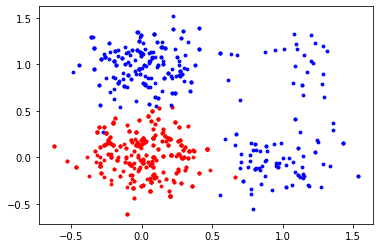

In [71]:
n.mostra_grafico()

In [72]:
n.dados = n.x_treino
n.treino()

-----------------------------
Época:  1 

Conjunto de dados embaralhado: 
 [[ 0.03195638 -0.10251385  1.        ]
 [-0.00967382  0.89776318  0.        ]
 [-0.04716837  0.19363929  1.        ]
 ...
 [ 0.01272533  0.20346543  1.        ]
 [-0.22671361  0.21841371  1.        ]
 [-0.07825563 -0.08083512  1.        ]] 

-----------------------------
Época:  2 

Conjunto de dados embaralhado: 
 [[ 0.20013586 -0.41657686  1.        ]
 [ 0.32622018 -0.00707064  1.        ]
 [-0.06282733 -0.32877261  1.        ]
 ...
 [ 0.26985956  0.87102575  0.        ]
 [ 0.29230086  1.36100048  0.        ]
 [ 1.10933458 -0.18927038  0.        ]] 

-----------------------------
Época:  3 

Conjunto de dados embaralhado: 
 [[-0.32030378 -0.05453506  1.        ]
 [ 0.01327531  1.10693866  0.        ]
 [-0.3001711   0.32724374  1.        ]
 ...
 [-0.0054924  -0.30231266  1.        ]
 [-0.07825563 -0.08083512  1.        ]
 [-0.28620777  1.059365    0.        ]] 

-----------------------------
Época:  4 

Conjunt

Conjunto de dados embaralhado: 
 [[ 0.15252857  0.01744889  1.        ]
 [ 0.14814828  1.19025708  0.        ]
 [ 0.05786483 -0.36451414  1.        ]
 ...
 [-0.33512655  1.1774808   0.        ]
 [-0.01545201  0.94861297  0.        ]
 [ 0.02913203  0.02879716  1.        ]] 

-----------------------------
Época:  77 

Conjunto de dados embaralhado: 
 [[-0.01465206  0.12680101  1.        ]
 [-0.00480107  1.08784779  0.        ]
 [ 0.02409823  0.16569508  1.        ]
 ...
 [-0.32030378 -0.05453506  1.        ]
 [ 0.0474884   0.76108048  0.        ]
 [-0.11163154  0.00851976  1.        ]] 

-----------------------------
Época:  78 

Conjunto de dados embaralhado: 
 [[ 1.19127938 -0.30479213  0.        ]
 [-0.29580217  0.56265815  0.        ]
 [ 0.07988839  0.21101297  1.        ]
 ...
 [ 0.06627455 -0.26057051  1.        ]
 [ 0.29560862  0.08406349  1.        ]
 [ 0.46304142  0.09405471  1.        ]] 

-----------------------------
Época:  79 

Conjunto de dados embaralhado: 
 [[-0.29322959

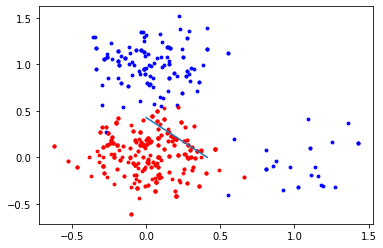

In [73]:
n.mostra_grafico()

In [74]:
def previsao():
    real = []
    previsto = []
    numero_de_acertos = 0
    numero_de_erros   = 0
    for i in n.x_teste:
        entrada = np.concatenate((np.array([n.vies]), i[:2]))
        
        yd = int(i[2:])
        yr = round(entrada.dot(n.pesos),4)
        yr = n.funcao_ativacao(yr)
        
        if(yr == yd):
            numero_de_acertos+=1
        else:
            numero_de_erros+=1
        
        real.append(yd)
        previsto.append(yr)
        
    acc = numero_de_acertos/ (numero_de_acertos+numero_de_erros)
    return numero_de_acertos, numero_de_erros, real, previsto, acc

In [75]:
numero_de_acertos, numero_de_erros, real, previsto, acc = previsao()

In [76]:
print("Quantidade de acertos: ", numero_de_acertos, "\nQuantidade de erros  : " ,numero_de_erros)

Quantidade de acertos:  230 
Quantidade de erros  :  10


# Matriz de confusão

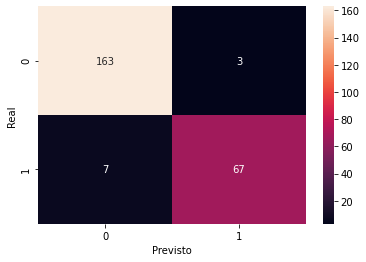

In [77]:
results = {'real': real, 'previsto': previsto}
results_df = pd.DataFrame.from_dict(results)
confusion_matrix = pd.crosstab(results_df['real'], results_df['previsto'], rownames=['Real'], colnames=['Previsto'])
sn.heatmap(confusion_matrix, annot=True, fmt="d")
plt.show()

# Acurácia

In [78]:
print("A acurácia é:", acc)

A acurácia é: 0.9583333333333334


In [79]:
 confusion_matrix.values

array([[163,   3],
       [  7,  67]], dtype=int64)

In [80]:
tn = confusion_matrix.values[0][0]
fp = confusion_matrix.values[0][1]
fn = confusion_matrix.values[1][0]
tp = confusion_matrix.values[1][1]
tn, fp, fn, tp

(163, 3, 7, 67)

# Precisão

In [81]:
precision = tp/(tp+fp)
print("A precisao e:", precision)

A precisao e: 0.9571428571428572


# Revocação

In [82]:
recall = tp/(tp+fn)
print("A revocacao e:", recall)

A revocacao e: 0.9054054054054054


# F-Score

In [83]:
f_score = (2*(precision*recall))/(precision+recall)
print("O valor de F-Score e:", f_score)

O valor de F-Score e: 0.9305555555555555


# Qualidade da Solução

A acurácia do modelo treinado perante o conjunto de testes é de 95,83%, onde de 240 exemplos de teste, apenas 10 tiveram uma saída incorreta. A precisão foi de 0.95, a revocação de 0.90, enquanto o F-Score (média harmônica entre precisão e revocação) foi de 0.93. A partir desses resultados podemos dizer que o modelo (nessas condições, levando em consideração esses pesos, a taxa de aprendizagem e o valor de ϑ) é satisfatório, com uma alta acurácia e o F-Score está próximo de 1, já que o modelo apresentou apenas 7 falsos positivos e 3 falsos negativos.

# Solução do Perceptron com gráficos usando dados de treinamento e de teste

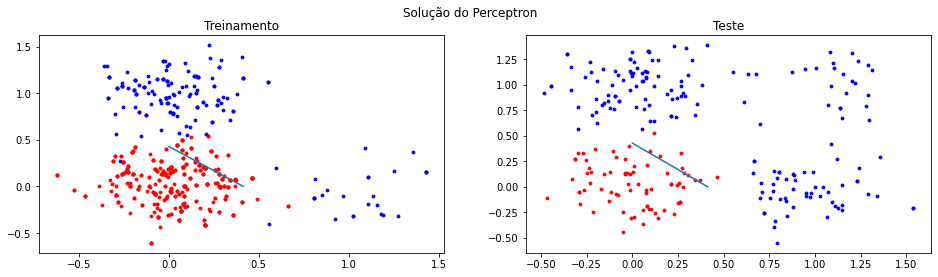

In [84]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(4)
fig.set_figwidth(16)

fig.suptitle("Solução do Perceptron")
ax1.set_title("Treinamento")
ax2.set_title("Teste")

ponto1 = [0,n.x1]
ponto2 = [n.x2,0]
x_values = [ponto1[0], ponto2[0]]
y_values = [ponto1[1], ponto2[1]]

#Treino
for i in n.x_treino:
    x = i[0]
    y = i[1]
    yd = int(i[2])
    if(yd >= 1):
        ax1.scatter(x,y, color='r', s=8)
    else:
        ax1.scatter(x,y, color='b', s=8)

#Teste
for i in n.x_teste:
    x = i[0]
    y = i[1]
    yd = int(i[2])
    if(yd >= 1):
        ax2.scatter(x,y, color='r', s=8)
    else:
        ax2.scatter(x,y, color='b', s=8)

ax1.plot(x_values, y_values)
ax2.plot(x_values, y_values)
